# Lab 7.01 - Time series analysis

In [1]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 1 - House sales

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [4]:
houses_sold = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
houses_sold.head()

C:\Users\vinni\AppData\Local\Temp\ipykernel_15824\2069034389.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  houses_sold = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

<Axes: xlabel='Month'>

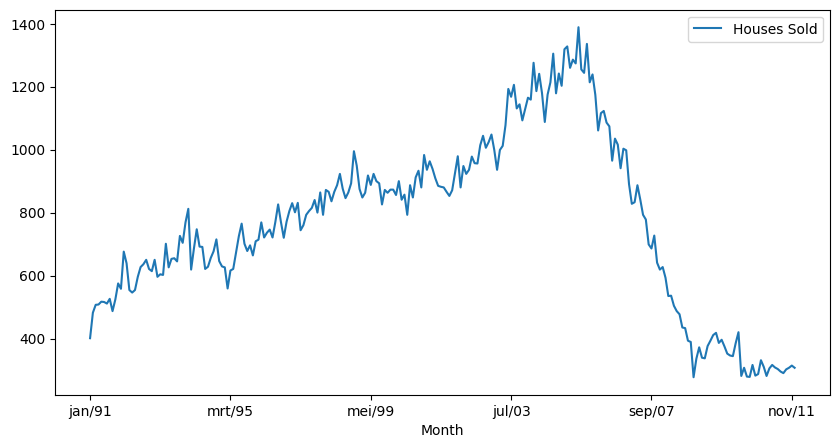

In [6]:
houses_sold.plot(y='Houses Sold', figsize=[10, 5])

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [7]:
houses_sold['SMA3'] = houses_sold['Houses Sold'].rolling(3).mean()
houses_sold['SMA6'] = houses_sold['Houses Sold'].rolling(6).mean()
houses_sold['SMA12'] = houses_sold['Houses Sold'].rolling(12).mean()
houses_sold

,Houses Sold,SMA3,SMA6,SMA12
Month,,,,
jan/91,401,NaN,NaN,NaN
feb/91,482,NaN,NaN,NaN
mrt/91,507,463.333333,NaN,NaN
apr/91,508,499.000000,NaN,NaN
mei/91,517,510.666667,NaN,NaN
...,...,...,...,...
aug/11,290,296.000000,302.833333,302.000000
sep/11,302,295.666667,302.333333,300.833333
okt/11,307,299.666667,300.833333,302.916667


Add predictions for Simple Exponential Smooting to the dataframe.

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train the model
houses_sold_ses = SimpleExpSmoothing(houses_sold['Houses Sold']).fit(
    smoothing_level=0.1, optimized=False)

# Add fitted values to the dataframe
houses_sold['SES'] = houses_sold_ses.level
houses_sold.head(15)

C:\Users\vinni\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vinni\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Houses Sold,SMA3,SMA6,SMA12,SES
Month,,,,,
jan/91,401,NaN,NaN,NaN,401.000000
feb/91,482,NaN,NaN,NaN,409.100000
mrt/91,507,463.333333,NaN,NaN,418.890000
apr/91,508,499.000000,NaN,NaN,427.801000
mei/91,517,510.666667,NaN,NaN,436.720900
jun/91,516,513.666667,488.500000,NaN,444.648810
jul/91,511,514.666667,506.833333,NaN,451.283929
aug/91,526,517.666667,514.166667,NaN,458.755536
sep/91,487,508.000000,510.833333,NaN,461.579982


Add predictions for Double Exponential Smoothing to the dataframe.

In [11]:
from statsmodels.tsa.api import Holt

houses_sold_des = Holt(houses_sold['Houses Sold']).fit(
    smoothing_level=.1,
    smoothing_trend=.2,
    optimized=False)

houses_sold['DES'] = houses_sold_des.level
houses_sold.tail()

C:\Users\vinni\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\vinni\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,Houses Sold,SMA3,SMA6,SMA12,SES,DES
Month,,,,,,
aug/11,290,296.000000,302.833333,302.000000,319.903776,304.950346
sep/11,302,295.666667,302.333333,300.833333,318.113398,302.334172
okt/11,307,299.666667,300.833333,302.916667,317.002058,300.472931
nov/11,314,307.666667,301.833333,305.166667,316.701853,299.628356
dec/11,307,309.333333,302.500000,303.166667,315.731667,298.455672


Calculate the MAE to find the best model. First drop the rows with NaN.

In [13]:
houses_sold = houses_sold.dropna()

In [14]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
for c in columns:
  print(f'MAE {c} = {mean_absolute_error(houses_sold['Houses Sold'],houses_sold[c])}')

MAE SMA3 = 26.431535269709546
MAE SMA6 = 36.81120331950208
MAE SMA12 = 54.41562932226833
MAE SES = 70.77110245423447
MAE DES = 51.48756898811065


## Source
Business Analytics Data Analysis & Decision Making 